In [1]:
# read image from './COVID-19_Radiography_Dataset/COVID/test_images/COVID-TEST-1.png'

# import the necessary packages
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import pandas as pd
import seaborn as sns

In [2]:
# add sharpen to the image
def sharpen(img, ksize):
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    return cv2.filter2D(img, -1, kernel)

In [3]:
covid_test_images_length = len(os.listdir(
    './COVID-19_Radiography_Dataset/COVID/test_images/'))
normal_test_images_length = len(os.listdir(
    './COVID-19_Radiography_Dataset/Normal/test_images/'))
pneumonia_test_images_length = len(os.listdir(
    './COVID-19_Radiography_Dataset/Viral Pneumonia/test_images/'))

covid_test_images = []
for i in range(1, covid_test_images_length+1):
    covid_test_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/COVID/test_images/COVID-'+str(i)+'.png'))

normal_test_images = []
for i in range(1, normal_test_images_length+1):
    normal_test_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/Normal/test_images/Normal-'+str(i)+'.png'))

pneumonia_test_images = []
for i in range(1, pneumonia_test_images_length+1):
    pneumonia_test_images.append(cv2.imread(
        './COVID-19_Radiography_Dataset/Viral Pneumonia/test_images/Viral Pneumonia-'+str(i)+'.png'))

COVID-19 test images


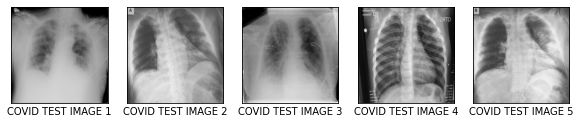

Normal test images


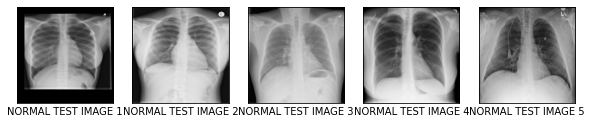

Pneumonia test images


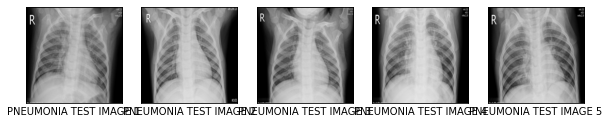

In [4]:
# # display the 3 images in the same figure with subplots
print('COVID-19 test images')
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(covid_test_images[i], cmap=plt.cm.binary)
    plt.xlabel('COVID TEST IMAGE '+str(i+1))
plt.show()

print('Normal test images')
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(normal_test_images[i], cmap=plt.cm.binary)
    plt.xlabel('NORMAL TEST IMAGE '+str(i+1))
plt.show()

print('Pneumonia test images')
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pneumonia_test_images[i], cmap=plt.cm.binary)
    plt.xlabel('PNEUMONIA TEST IMAGE '+str(i+1))

plt.show()

COVID-19 test images sharpen


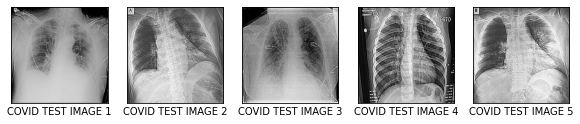

Normal test images sharpen


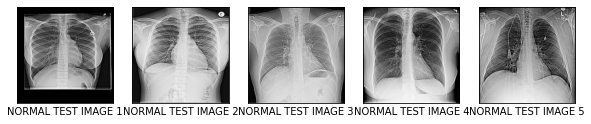

Pneumonia test images sharpen


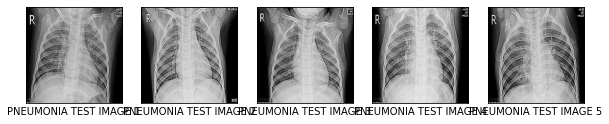

In [5]:
# sharpen al the images and display them
covid_test_images_sharpen = []
for i in range(len(covid_test_images)):
    covid_test_images_sharpen.append(sharpen(covid_test_images[i], 3))

normal_test_images_sharpen = []
for i in range(len(normal_test_images)):
    normal_test_images_sharpen.append(sharpen(normal_test_images[i], 3))

pneumonia_test_images_sharpen = []
for i in range(len(pneumonia_test_images)):
    pneumonia_test_images_sharpen.append(sharpen(pneumonia_test_images[i], 3))

print('COVID-19 test images sharpen')
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(covid_test_images_sharpen[i], cmap=plt.cm.binary)
    plt.xlabel('COVID TEST IMAGE '+str(i+1))
plt.show()

print('Normal test images sharpen')
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(normal_test_images_sharpen[i], cmap=plt.cm.binary)
    plt.xlabel('NORMAL TEST IMAGE '+str(i+1))
plt.show()

print('Pneumonia test images sharpen')
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(pneumonia_test_images_sharpen[i], cmap=plt.cm.binary)
    plt.xlabel('PNEUMONIA TEST IMAGE '+str(i+1))
plt.show()

# save the sharpen images to the folder test_images_sharpen
for i in range(len(covid_test_images_sharpen)):
    cv2.imwrite('./COVID-19_Radiography_Dataset/COVID/test_images_sharpen/COVID-'+str(i+1)+'.png', covid_test_images_sharpen[i])

for i in range(len(normal_test_images_sharpen)):
    cv2.imwrite('./COVID-19_Radiography_Dataset/Normal/test_images_sharpen/Normal-'+str(i+1)+'.png', normal_test_images_sharpen[i])

for i in range(len(pneumonia_test_images_sharpen)):
    cv2.imwrite('./COVID-19_Radiography_Dataset/Viral Pneumonia/test_images_sharpen/Viral Pneumonia-'+str(i+1)+'.png', pneumonia_test_images_sharpen[i])
    

In [6]:
# function to return a vector of frequency of all intensities from 0 to 255

def get_img_vector(img):
    img_vector = np.zeros(256)
    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
            img_vector[img[i][j]] += 1
    return img_vector


# function to calculate euclidean distance between two vectors
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.square(vector1 - vector2)))

# function to calculate manhattan distance between two vectors
def manhattan_distance(vector1, vector2):
    return np.sum(np.abs(vector1 - vector2))

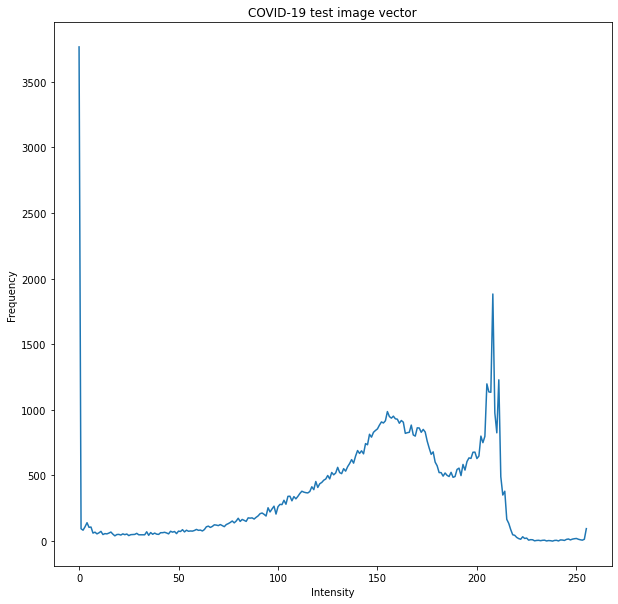

In [7]:
# get the vectors of 1st image of covid test images
covid_test_img_vector = get_img_vector(covid_test_images_sharpen[0])

# plot covid test image vector
plt.figure(figsize=(10,10))
plt.plot(covid_test_img_vector)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('COVID-19 test image vector')
plt.show()

In [ ]:
covid_test_vector = []
for i in range(len(covid_test_images_sharpen)):
    covid_test_vector.append(get_img_vector(covid_test_images_sharpen[i]))

normal_test_vector = []
for i in range(len(normal_test_images_sharpen)):
    normal_test_vector.append(get_img_vector(normal_test_images_sharpen[i]))

pneumonia_test_vector = []
for i in range(len(pneumonia_test_images_sharpen)):
    pneumonia_test_vector.append(get_img_vector(pneumonia_test_images_sharpen[i]))

In [ ]:
# save the vectors to txt files
with open('./COVID-19_Radiography_Dataset/COVID/covid_test_vector.txt', 'w') as f:
    f.write(str(covid_test_vector))

with open('./COVID-19_Radiography_Dataset/Normal/normal_test_vector.txt', 'w') as f:
    f.write(str(normal_test_vector))

with open('./COVID-19_Radiography_Dataset/Viral Pneumonia/pneumonia_test_vector.txt', 'w') as f:
    f.write(str(pneumonia_test_vector))